In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (12, 8)

### data

In [5]:
file_path = "../data/time_series/period_trend.csv"
series = pd.read_csv(file_path, header=0, index_col=0, squeeze=True)
series.head()

1
2   -0.116438
3    0.739863
4    0.736863
5    0.228948
6    2.257073
Name: -0.6656603714, dtype: float64

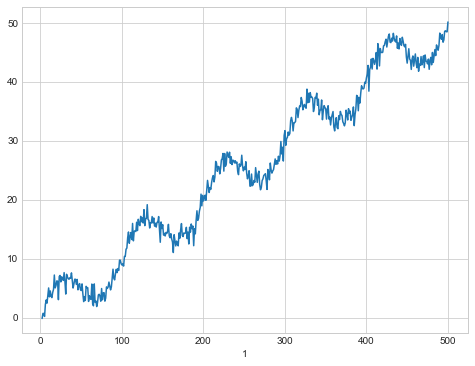

In [6]:
series.plot(figsize=figsize
pyplot.show()

### model

In [8]:
reader = tf.contrib.timeseries.CSVReader(file_path)

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [47]:
with tf.Session() as sess:
    data = reader.read_full()
    coord = tf.train.Coordinator()
    tf.train.start_queue_runners(sess=sess, coord=coord)
    data = sess.run(data)
    coord.request_stop()

In [48]:
periodicities = 100
input_window_size = 10
output_window_size = 6
num_features = 1
loss = tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS

ar = tf.contrib.timeseries.ARRegressor(periodicities=periodicities,
                                       input_window_size=input_window_size,
                                       output_window_size=output_window_size,
                                       num_features=num_features,
                                       loss=loss)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x115629910>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/g_/3hnb1ngx6b7986bb368_k5hm0000gp/T/tmpP86sHq', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


In [41]:
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size=16, window_size=16)

In [49]:
ar.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/g_/3hnb1ngx6b7986bb368_k5hm0000gp/T/tmpP86sHq/model.ckpt.
INFO:tensorflow:loss = 1.6792514, step = 1
INFO:tensorflow:global_step/sec: 461.161
INFO:tensorflow:loss = -0.1516531, step = 101 (0.219 sec)
INFO:tensorflow:global_step/sec: 971.12
INFO:tensorflow:loss = -0.62030524, step = 201 (0.103 sec)
INFO:tensorflow:global_step/sec: 1000.54
INFO:tensorflow:loss = -0.65816563, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1001.96
INFO:tensorflow:loss = -0.9172987, step = 401 (0.100 sec)
INFO:tensorflow:global_step/sec: 986.856
INFO:tensorflow:loss = -0.7857163, step = 501 (0.102 sec)
INFO:tensorflow:global_step/sec: 996.274
INFO:tensorflow:loss = -1.0411555, step = 601 (0.100 sec)
INFO:ten

In [50]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)

In [54]:
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-24-02:44:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/g_/3hnb1ngx6b7986bb368_k5hm0000gp/T/tmpP86sHq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-24-02:44:58
INFO:tensorflow:Saving dict for global step 1000: covariance = [[[1.440692  ]
  [2.2083468 ]
  [1.3618335 ]
  [1.1149677 ]
  [1.3266987 ]
  [0.94574654]
  [1.4022303 ]
  [2.190264  ]
  [1.7182736 ]
  [1.5653187 ]
  [1.1284151 ]
  [1.0475501 ]
  [1.279728  ]
  [2.0041027 ]
  [1.3641973 ]
  [1.964535  ]
  [1.8848459 ]
  [0.9053539 ]
  [1.2676711 ]
  [1.545718  ]
  [0.99323165]
  [0.80491024]
  [0.84913653]
  [0.7471589 ]
  [0.8976978 ]
  [1.1338433 ]
  [0.8953308 ]
  [1.1944833 ]
  [0.8052039 ]
  [1.0834438 ]
  [0.79274946]
  [1.215706

In [55]:
evaluation.keys()

['loss',
 'start_tuple',
 'global_step',
 'covariance',
 'times',
 'observed',
 'mean']

In [56]:
temp = ar.predict(input_fn=tf.contrib.timeseries.predict_continuation_input_fn(evaluation, steps=250))

In [57]:
type(temp)

generator

In [61]:
input_fn = tf.contrib.timeseries.predict_continuation_input_fn(evaluation, steps=250)
(predictions,) = tuple(ar.predict(input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/g_/3hnb1ngx6b7986bb368_k5hm0000gp/T/tmpP86sHq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [63]:
predictions.keys()

['mean', 'covariance', 'times']

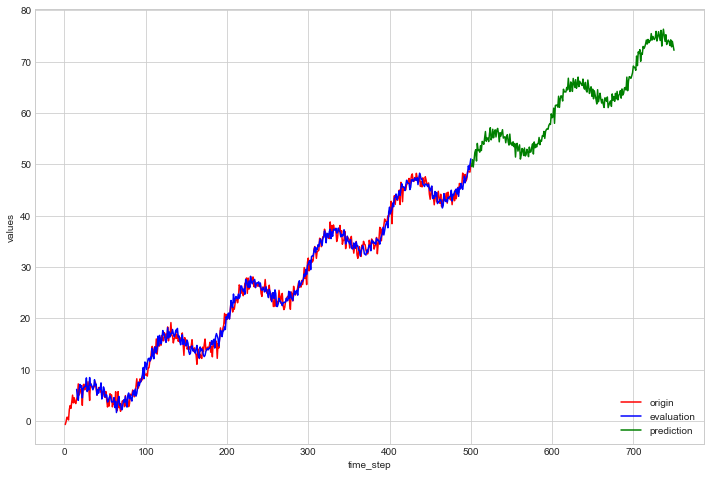

In [97]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin', color='red')
pyplot.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation', color='b')
pyplot.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction', color='g')
pyplot.xlabel('time_step')
pyplot.ylabel('values')
pyplot.legend(loc=4)
pyplot.show()